In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

color = sns.color_palette()
pd.options.mode.chained_assignment = None  # default='warn'

In [117]:
df1 = pd.read_excel("2019_bronx.xlsx")
df2 = pd.read_excel("2019_brooklyn.xlsx")
df3 = pd.read_excel("2019_manhattan.xlsx")
df4 = pd.read_excel("2019_queens.xlsx")
df5 = pd.read_excel("2019_statenisland.xlsx")

In [23]:
df1['AREA'] = 'bronx'
df2['AREA'] = 'brooklyn'
df3['AREA'] = 'manhattan'
df4['AREA'] = 'queens'
df5['AREA'] = 'statenisland'

In [24]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

In [25]:
df.columns = ['BOROUGH',
                  'NEIGHBORHOOD',
                  'BUILDING CLASS CATEGORY',
                  'TAX CLASS AS OF FINAL ROLL 18/19',
                  'BLOCK',
                  'LOT',
                  'EASE-MENT',
                  'BUILDING CLASS AS OF FINAL ROLL 18/19',
                  'ADDRESS',
                  'APARTMENT NUMBER',
                  'ZIP CODE',
                  'RESIDENTIAL UNITS',
                  'COMMERCIAL UNITS',
                  'TOTAL UNITS',
                  'LAND SQUARE FEET',
                  'GROSS SQUARE FEET',
                  'YEAR BUILT',
                  'TAX CLASS AT TIME OF SALE',
                  'BUILDING CLASS AT TIME OF SALE',
                  'SALE PRICE',
                  'SALE DATE',
                  'AREA']

In [26]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 83920 rows and 22 colummns


In [27]:
df.isna().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19           191
BLOCK                                        0
LOT                                          0
EASE-MENT                                83920
BUILDING CLASS AS OF FINAL ROLL 18/19      191
ADDRESS                                      0
APARTMENT NUMBER                         65581
ZIP CODE                                    14
RESIDENTIAL UNITS                        17173
COMMERCIAL UNITS                         17173
TOTAL UNITS                              17173
LAND SQUARE FEET                         17173
GROSS SQUARE FEET                        17173
YEAR BUILT                                6024
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
AREA         

In [28]:
df['FINAL_ADDRESS'] = df['ADDRESS'].apply(lambda x: x+" NYC")

In [29]:
df = df.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis = 1) 

In [30]:
df.isna().sum()

BOROUGH                                      0
NEIGHBORHOOD                                 0
BUILDING CLASS CATEGORY                      0
TAX CLASS AS OF FINAL ROLL 18/19           191
BLOCK                                        0
LOT                                          0
BUILDING CLASS AS OF FINAL ROLL 18/19      191
ADDRESS                                      0
ZIP CODE                                    14
RESIDENTIAL UNITS                        17173
COMMERCIAL UNITS                         17173
TOTAL UNITS                              17173
LAND SQUARE FEET                         17173
GROSS SQUARE FEET                        17173
YEAR BUILT                                6024
TAX CLASS AT TIME OF SALE                    0
BUILDING CLASS AT TIME OF SALE               0
SALE PRICE                                   0
SALE DATE                                    0
AREA                                         0
FINAL_ADDRESS                                0
dtype: int64

In [31]:
df = df.dropna(how='any',axis=0)

In [32]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 61098 rows and 21 colummns


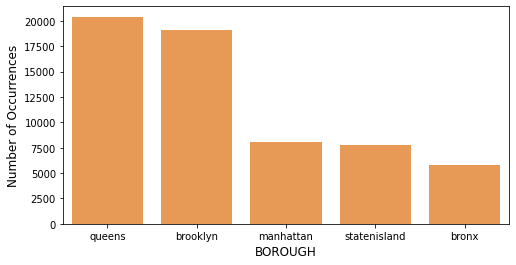

In [33]:
int_level = df['AREA'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BOROUGH', fontsize=12)
plt.show()

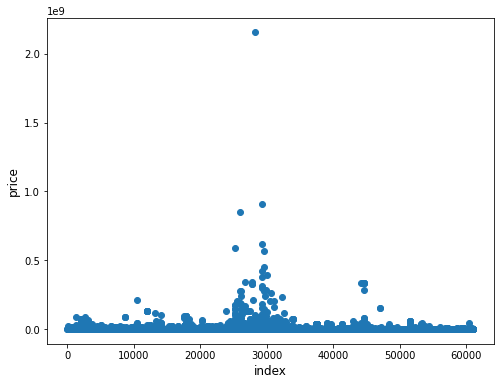

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), df['SALE PRICE'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [35]:
df = df[df['SALE PRICE'] < 3e6]

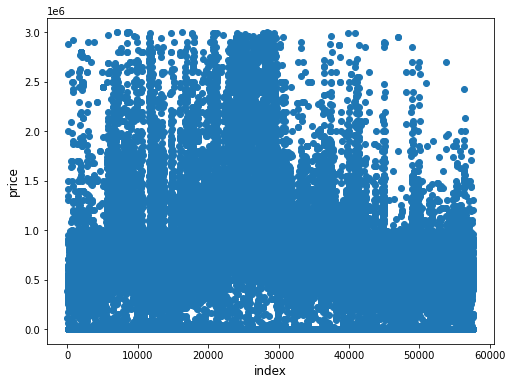

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), df['SALE PRICE'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [37]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 57677 rows and 21 colummns


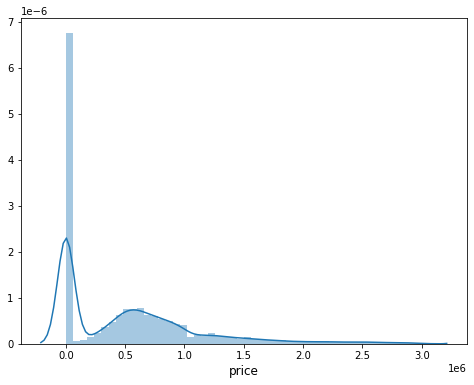

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [39]:
df = df[df['SALE PRICE'] > 100000]

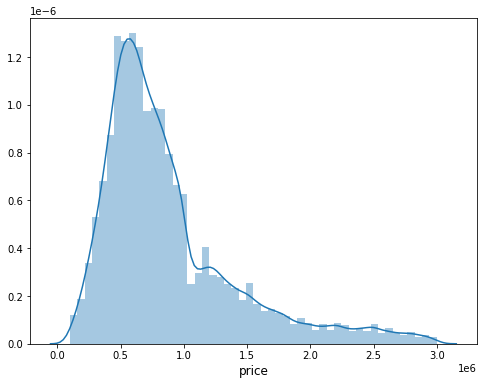

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [41]:
df = df[df['SALE PRICE'] < 2e6]

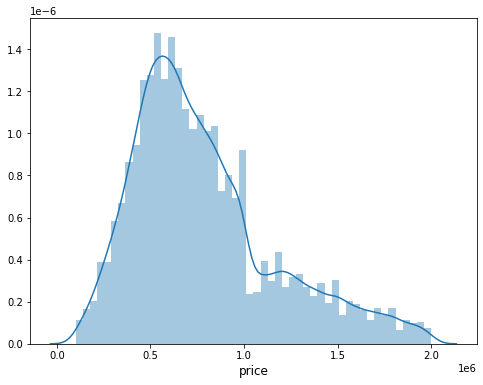

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [43]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32153 rows and 21 colummns


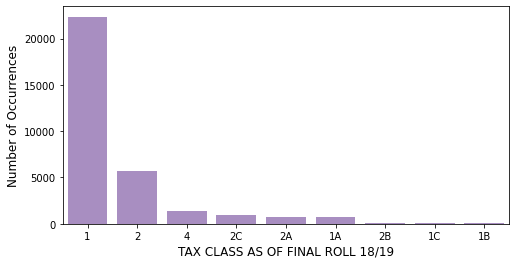

In [44]:
int_level = df['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TAX CLASS AS OF FINAL ROLL 18/19', fontsize=12)
plt.show()




In [ ]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,A9,2327 WASHINGTON AVENUE,10458.0,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A9,110000,2019-12-06,bronx,2327 WASHINGTON AVENUE NYC


In [45]:

uniqueValues = df['RESIDENTIAL UNITS'].unique()
print('Unique elements in column "RESIDENTIAL UNITS" ')
print(np.sort(uniqueValues))

Unique elements in column "RESIDENTIAL UNITS" 
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  24.  26.  28.  29.  30.
  32.  35.  36.  40.  45.  48.  55.  63.  77.  80. 122. 130. 142. 145.
 155. 200. 261. 285.]


In [46]:
df = df[df['RESIDENTIAL UNITS'] < 10.0]

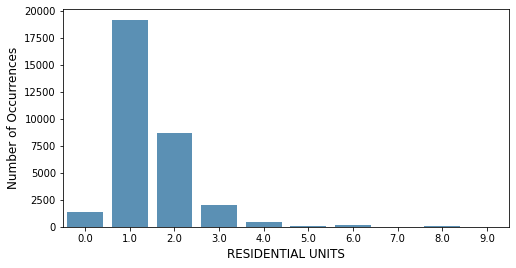

In [47]:
cnt_srs = df['RESIDENTIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RESIDENTIAL UNITS', fontsize=12)
plt.show()



In [48]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32057 rows and 21 colummns


In [49]:
uniqueValues = df['COMMERCIAL UNITS'].unique()
print('Unique elements in column "COMMERCIAL UNITS" ')
print(np.sort(uniqueValues))

Unique elements in column "COMMERCIAL UNITS" 
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  13.  14.  15.  20.
  35.  60.  64.  65. 133. 259.]


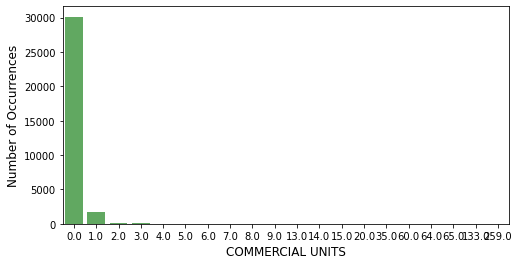

In [50]:
cnt_srs = df['COMMERCIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('COMMERCIAL UNITS', fontsize=12)
plt.show()

In [51]:
df = df[df['COMMERCIAL UNITS'] < 5.0]

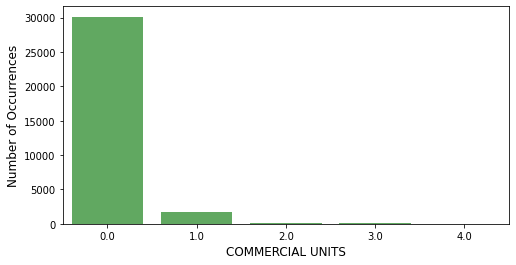

In [52]:
cnt_srs = df['COMMERCIAL UNITS'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('COMMERCIAL UNITS', fontsize=12)
plt.show()

In [53]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32023 rows and 21 colummns


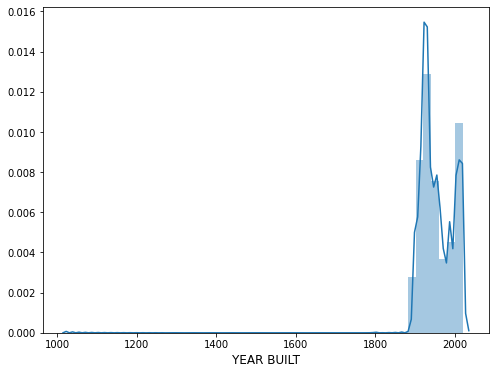

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

In [55]:
uniqueValues = df['YEAR BUILT'].unique()
print('Unique elements in column "YEAR BUILT" ')
print(np.sort(uniqueValues))

Unique elements in column "YEAR BUILT" 
[1030. 1800. 1840. 1845. 1857. 1870. 1871. 1873. 1875. 1880. 1881. 1886.
 1890. 1892. 1893. 1895. 1897. 1899. 1900. 1901. 1902. 1903. 1904. 1905.
 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917.
 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929.
 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941.
 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953.
 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.
 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977.
 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989.
 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020.]


In [56]:
df = df[df['YEAR BUILT'] > 1860]
df = df[df['YEAR BUILT'] <= 2020]

In [57]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 32005 rows and 21 colummns


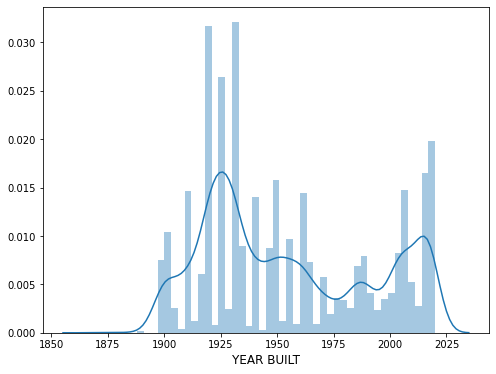

In [58]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

In [59]:
df = df[df['YEAR BUILT'] > 1890]

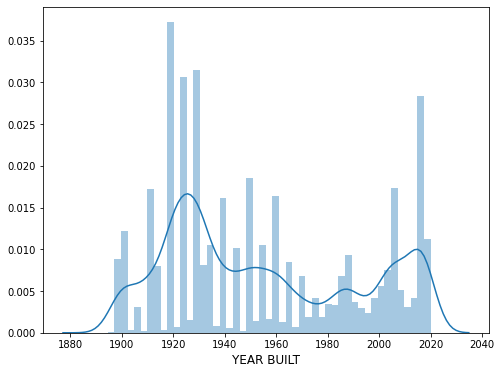

In [60]:
plt.figure(figsize=(8,6))
sns.distplot(df['YEAR BUILT'].values, bins=50, kde=True)
plt.xlabel('YEAR BUILT', fontsize=12)
plt.show()

In [61]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 31969 rows and 21 colummns


In [62]:
uniqueValues = df['YEAR BUILT'].unique()
print('Unique elements in column "YEAR BUILT" ')
print(np.sort(uniqueValues))

Unique elements in column "YEAR BUILT" 
[1892. 1893. 1895. 1897. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019. 2020.]


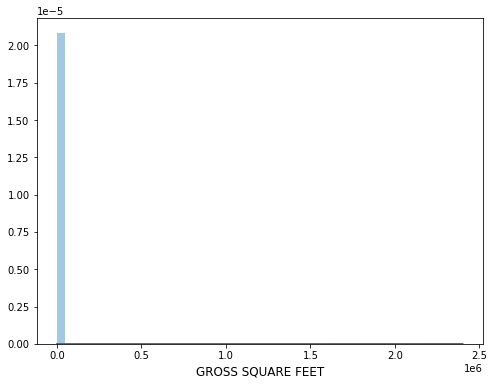

In [63]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [64]:
df = df[df['GROSS SQUARE FEET'] < 5000]

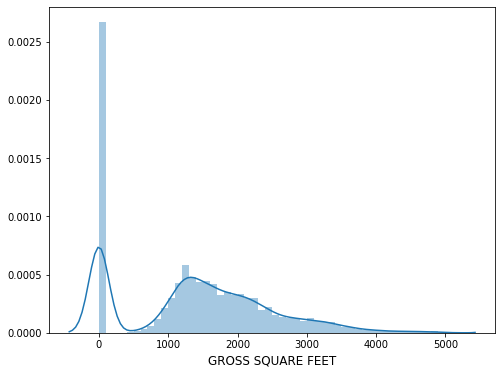

In [65]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [66]:
df = df[df['GROSS SQUARE FEET'] < 4600]

In [67]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 31547 rows and 21 colummns


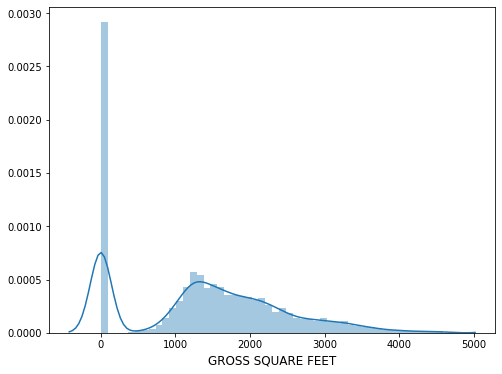

In [68]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [69]:
df = df[df['GROSS SQUARE FEET'] > 50]

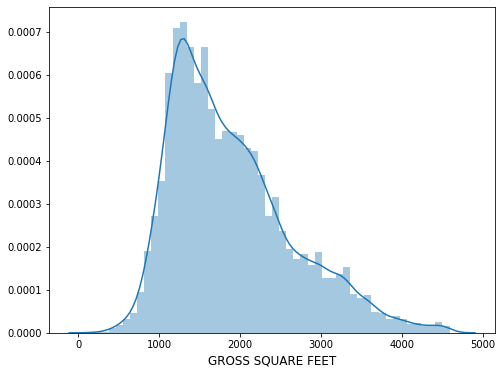

In [70]:
plt.figure(figsize=(8,6))
sns.distplot(df['GROSS SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('GROSS SQUARE FEET', fontsize=12)
plt.show()

In [71]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 23108 rows and 21 colummns


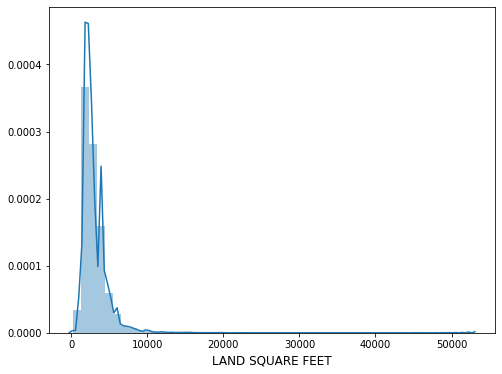

In [72]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [73]:
df = df[df['LAND SQUARE FEET'] > 200]

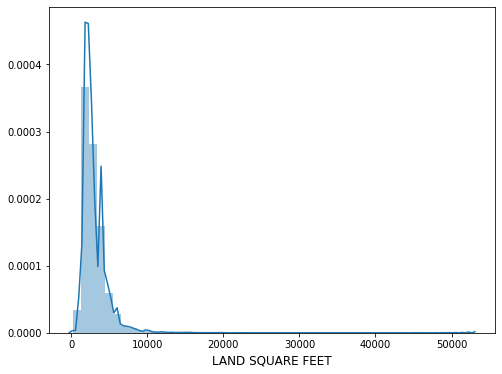

In [74]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [75]:
df = df[df['LAND SQUARE FEET'] < 7000]

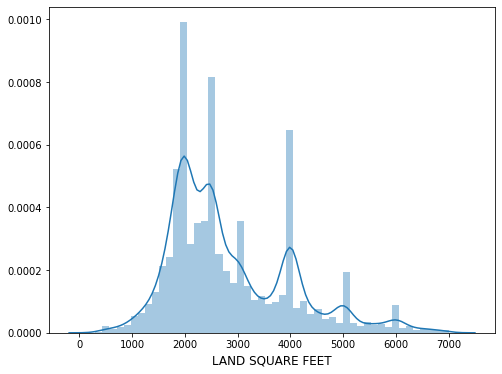

In [76]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [77]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 22501 rows and 21 colummns


In [78]:
df = df[df['LAND SQUARE FEET'] < 6000]

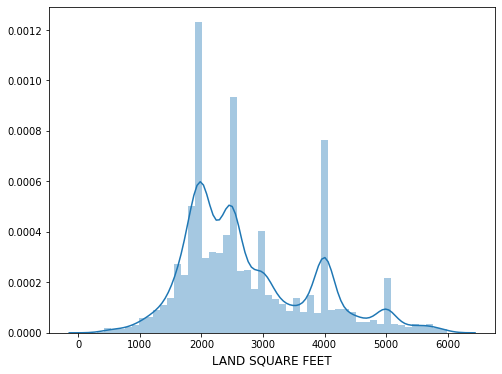

In [79]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [80]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 21990 rows and 21 colummns


In [81]:
df = df[df['LAND SQUARE FEET'] < 5000]

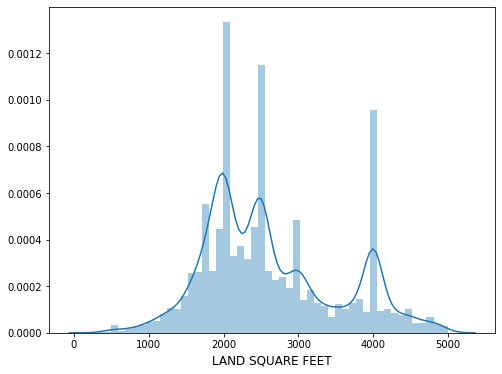

In [82]:
plt.figure(figsize=(8,6))
sns.distplot(df['LAND SQUARE FEET'].values, bins=50, kde=True)
plt.xlabel('LAND SQUARE FEET', fontsize=12)
plt.show()

In [83]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


In [ ]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,A9,2327 WASHINGTON AVENUE,10458.0,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A9,110000,2019-12-06,bronx,2327 WASHINGTON AVENUE NYC


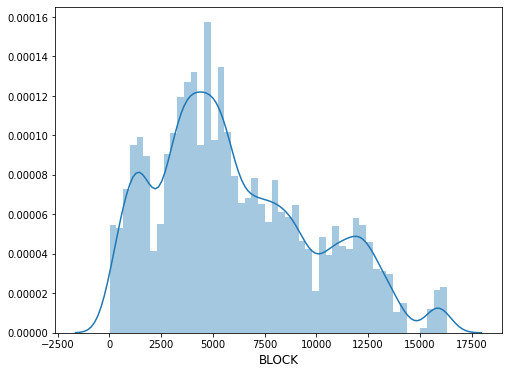

In [84]:
plt.figure(figsize=(8,6))
sns.distplot(df['BLOCK'].values, bins=50, kde=True)
plt.xlabel('BLOCK', fontsize=12)
plt.show()

In [ ]:
uniqueValues = df['BLOCK'].unique()
print('Unique elements in column "BLOCK" ')
print(np.size(np.sort(uniqueValues)))

Unique elements in column "BLOCK" 
10888


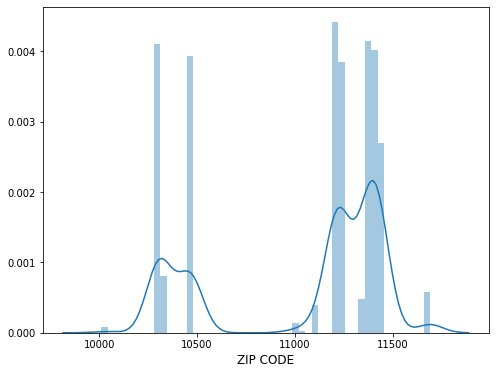

In [85]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()


In [86]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


In [87]:
df = df[df['ZIP CODE'] > 10000]

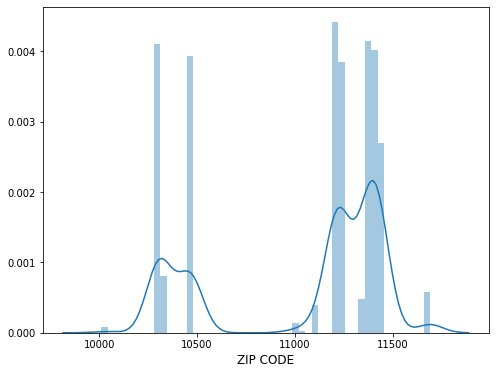

In [88]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()

In [89]:
df = df[df['ZIP CODE'] < 12000]

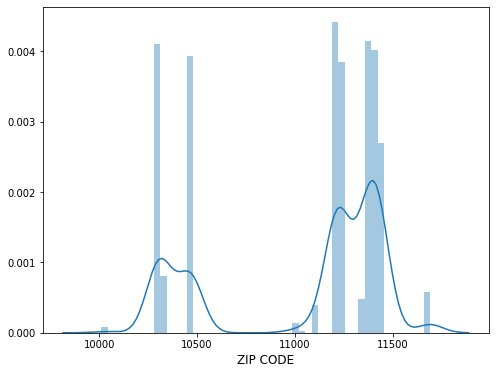

In [90]:
plt.figure(figsize=(8,6))
sns.distplot(df['ZIP CODE'].values, bins=50, kde=True)
plt.xlabel('ZIP CODE', fontsize=12)
plt.show()

In [91]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20895 rows and 21 colummns


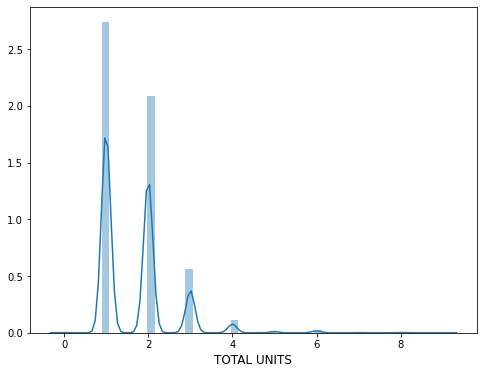

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(df['TOTAL UNITS'].values, bins=50, kde=True)
plt.xlabel('TOTAL UNITS', fontsize=12)
plt.show()

In [93]:
df = df[df['TOTAL UNITS'] < 5]

In [94]:
df = df[df['TOTAL UNITS'] > 0]

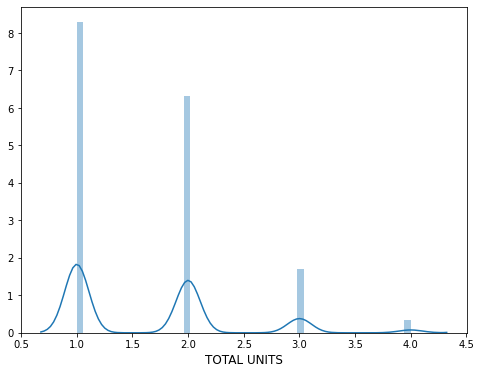

In [95]:
plt.figure(figsize=(8,6))
sns.distplot(df['TOTAL UNITS'].values, bins=50, kde=True)
plt.xlabel('TOTAL UNITS', fontsize=12)
plt.show()

In [96]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20695 rows and 21 colummns


In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC


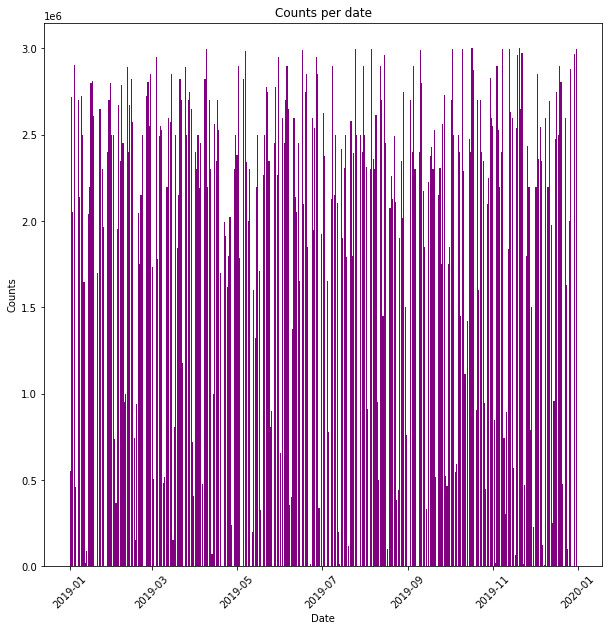

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(df['SALE DATE'].values,
        df['SALE PRICE'].values,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Counts",
       title="Counts per date")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


In [97]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20695 rows and 21 colummns


In [ ]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,A9,2327 WASHINGTON AVENUE,10458.0,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A9,110000,2019-12-06,bronx,2327 WASHINGTON AVENUE NYC


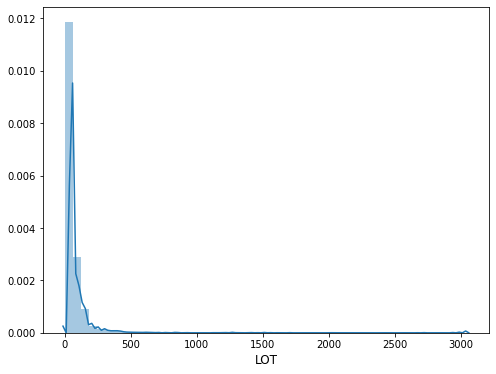

In [98]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [99]:
df = df[df['LOT'] < 300]

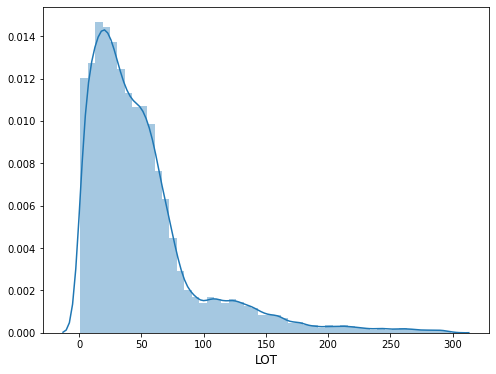

In [100]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [101]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 20235 rows and 21 colummns


In [102]:
df = df[df['LOT'] < 200]

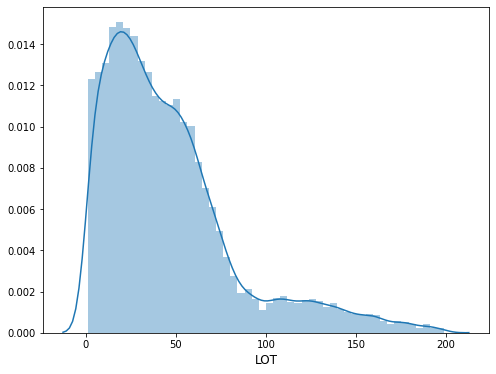

In [103]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [104]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 19835 rows and 21 colummns


In [105]:
df = df[df['LOT'] < 150]

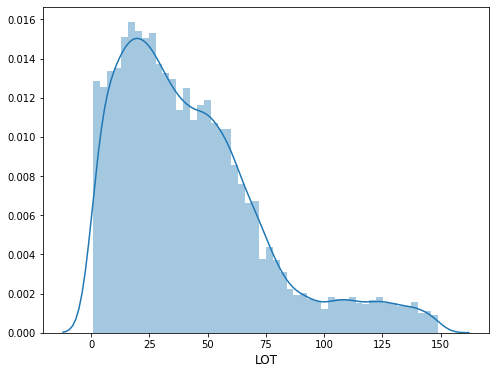

In [106]:
plt.figure(figsize=(8,6))
sns.distplot(df['LOT'].values, bins=50, kde=True)
plt.xlabel('LOT', fontsize=12)
plt.show()

In [107]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 19304 rows and 21 colummns


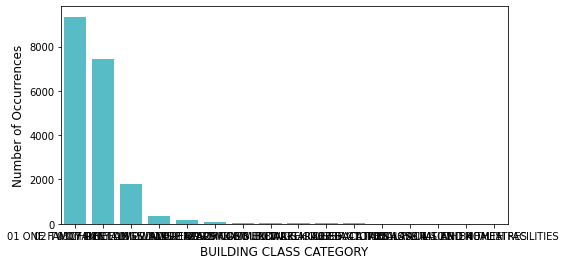

In [108]:
int_level = df['BUILDING CLASS CATEGORY'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BUILDING CLASS CATEGORY', fontsize=12)
plt.show()

In [109]:
cnt_srs = df['BUILDING CLASS CATEGORY'].value_counts()
print(cnt_srs)

01 ONE FAMILY DWELLINGS              9346
02 TWO FAMILY DWELLINGS              7449
03 THREE FAMILY DWELLINGS            1791
07 RENTALS - WALKUP APARTMENTS        348
22 STORE BUILDINGS                    153
14 RENTALS - 4-10 UNIT                 60
21 OFFICE BUILDINGS                    47
29 COMMERCIAL GARAGES                  35
30 WAREHOUSES                          22
37 RELIGIOUS FACILITIES                22
27 FACTORIES                           15
33 EDUCATIONAL FACILITIES               8
41 TAX CLASS 4 - OTHER                  3
38 ASYLUMS AND HOMES                    2
32 HOSPITAL AND HEALTH FACILITIES       2
34 THEATRES                             1
Name: BUILDING CLASS CATEGORY, dtype: int64


In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC


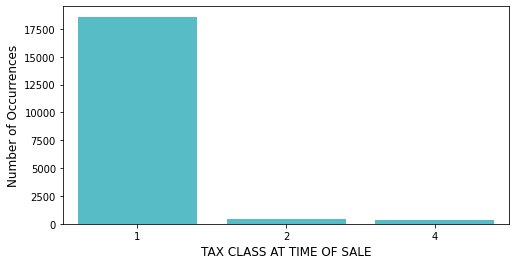

In [110]:
int_level = df['TAX CLASS AT TIME OF SALE'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TAX CLASS AT TIME OF SALE', fontsize=12)
plt.show()



In [111]:
cnt_srs = df['TAX CLASS AT TIME OF SALE'].value_counts()
print(cnt_srs)

1    18586
2      408
4      310
Name: TAX CLASS AT TIME OF SALE, dtype: int64


In [ ]:
df.loc[df['TAX CLASS AT TIME OF SALE'] == 4].head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
50,2,BATHGATE,22 STORE BUILDINGS,4,3039,21,K1,2345 WASHINGTON AVENUE,10458.0,0.0,1.0,1.0,4239.0,4239.0,1931.0,4,K1,1500000,2019-01-10,bronx,2345 WASHINGTON AVENUE NYC
57,2,BATHGATE,29 COMMERCIAL GARAGES,4,3029,26,G2,2090 WEBSTER AVENUE,10457.0,0.0,1.0,1.0,4360.0,1200.0,1996.0,4,G2,0,2019-09-04,bronx,2090 WEBSTER AVENUE NYC
62,2,BATHGATE,30 WAREHOUSES,4,2899,34,E1,407 EAST 174 STREET,10457.0,0.0,1.0,1.0,3439.0,3320.0,1955.0,4,E1,880000,2019-03-12,bronx,407 EAST 174 STREET NYC


In [ ]:
df.loc[df['TAX CLASS AT TIME OF SALE'] == 2]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
592,2,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,2A,4736,8,C3,3359 SEYMOUR AVENUE,10469.0,4.0,0.0,4.0,2567.0,3378.0,1934.0,2,C3,640000,2019-10-31,bronx,3359 SEYMOUR AVENUE NYC
593,2,BAYCHESTER,07 RENTALS - WALKUP APARTMENTS,2A,4762,89,C3,3017 EASTCHESTER ROAD,10469.0,4.0,0.0,4.0,1180.0,3300.0,1931.0,2,C3,750000,2019-02-15,bronx,3017 EASTCHESTER ROAD NYC
602,2,BAYCHESTER,14 RENTALS - 4-10 UNIT,2A,4762,40,S3,3061 EASTCHESTER ROAD,10469.0,3.0,1.0,4.0,3129.0,3296.0,1931.0,2,S3,750000,2019-01-15,bronx,3061 EASTCHESTER ROAD NYC
758,2,BEDFORD PARK/NORWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3318,86,C3,2792 MORRIS AVENUE,10468.0,4.0,0.0,4.0,2381.0,3040.0,1925.0,2,C3,875000,2019-03-28,bronx,2792 MORRIS AVENUE NYC
765,2,BEDFORD PARK/NORWOOD,07 RENTALS - WALKUP APARTMENTS,2A,3336,67,C3,108 EAST 208 STREET,10467.0,4.0,0.0,4.0,3822.0,3496.0,1925.0,2,C3,800000,2019-10-18,bronx,108 EAST 208 STREET NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847,5,STAPLETON,07 RENTALS - WALKUP APARTMENTS,2A,563,108,C3,244 GORDON STREET,10304.0,4.0,0.0,4.0,5600.0,2626.0,1931.0,2,C3,623301,2019-08-27,statenisland,244 GORDON STREET NYC
6848,5,STAPLETON,07 RENTALS - WALKUP APARTMENTS,2A,611,40,C3,25 PEARL STREET,10304.0,4.0,0.0,4.0,4312.0,3800.0,1930.0,2,C3,0,2019-05-10,statenisland,25 PEARL STREET NYC
7331,5,TOTTENVILLE,14 RENTALS - 4-10 UNIT,2A,8026,11,S9,161 MAIN STREET,10307.0,2.0,2.0,4.0,6572.0,2000.0,1931.0,2,S9,0,2019-04-26,statenisland,161 MAIN STREET NYC
7417,5,TRAVIS,07 RENTALS - WALKUP APARTMENTS,2A,2627,59,C3,29 SHELLEY AVENUE,10314.0,4.0,0.0,4.0,2500.0,1512.0,1931.0,2,C3,395000,2019-05-02,statenisland,29 SHELLEY AVENUE NYC


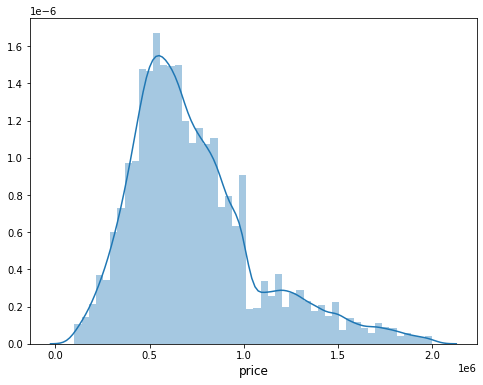

In [112]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [ ]:
cnt_srs = df['SALE PRICE'].value_counts()
print(cnt_srs)

0          15257
10           592
650000       288
600000       253
800000       247
           ...  
1071000        1
331667         1
1320822        1
1046348        1
716466         1
Name: SALE PRICE, Length: 3637, dtype: int64


In [113]:
df = df[df['SALE PRICE'] > 300000]

In [ ]:
cnt_srs = df['SALE PRICE']
print(np.sort(cnt_srs))

[   5314    5357    6200 ... 2999990 2999990 2999999]


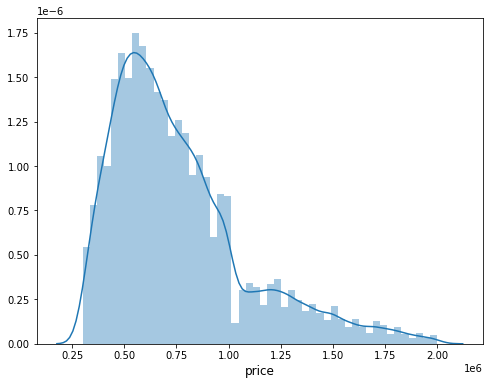

In [114]:
plt.figure(figsize=(8,6))
sns.distplot(df['SALE PRICE'].values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [115]:
print(f'Train data has {df.shape[0]} rows and {df.shape[1]} colummns')

Train data has 18279 rows and 21 colummns


In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,A1,4445 PARK AVENUE,10457.0,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23,bronx,4445 PARK AVENUE NYC


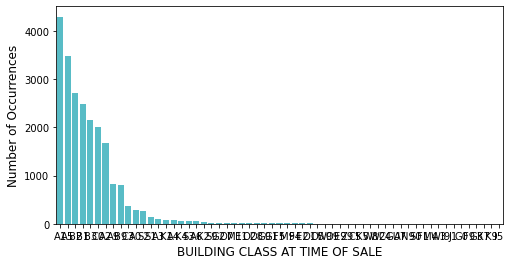

In [ ]:
int_level = df['BUILDING CLASS AT TIME OF SALE'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BUILDING CLASS AT TIME OF SALE', fontsize=12)
plt.show()


In [ ]:
cnt_srs = df['BUILDING CLASS AT TIME OF SALE'].value_counts()
print(cnt_srs)

A1    4300
A5    3482
B2    2723
B1    2483
B3    2161
C0    2010
A2    1676
A9     828
B9     814
C3     366
A0     293
S2     268
S1     135
A3     110
K1      76
A4      71
K4      66
S3      55
A6      50
K2      42
S9      22
G2      21
O7      21
M1      18
E1      17
O2      13
O8      12
G9      11
G1      11
F5       9
M9       9
F4       7
E2       7
O1       7
O5       6
W9       5
O9       5
E9       5
Z9       5
C5       4
K5       3
W8       2
W2       2
C4       2
GU       2
A7       2
N9       2
S0       2
F1       2
M4       1
W3       1
I9       1
J1       1
G0       1
F9       1
G3       1
K7       1
K9       1
I5       1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64


In [ ]:
# split the data into train and test set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_target = df_train['SALE PRICE']
df_train = df_train.drop(['SALE PRICE'], axis=1)

test_target = df_test['SALE PRICE']
df_test = df_test.drop(['SALE PRICE'], axis=1)


In [ ]:
print(f'Train data has {df_train.shape[0]} rows and {df_train.shape[1]} colummns')
print(f'Test data has {df_test.shape[0]} rows and {df_test.shape[1]} colummns')

Train data has 17802 rows and 20 colummns
Test data has 4451 rows and 20 colummns


In [ ]:
df_train.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,AREA,FINAL_ADDRESS
7857,2,WILLIAMSBRIDGE,02 TWO FAMILY DWELLINGS,1,4696,10,B1,1043 EAST 213 STREET,10469.0,2.0,0.0,2.0,1942.0,1440.0,1945.0,1,B1,2019-02-15,bronx,1043 EAST 213 STREET NYC
11463,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,1,5143,66,A1,322 ARGYLE ROAD,11218.0,1.0,0.0,1.0,5000.0,1877.0,1899.0,1,A1,2019-02-04,brooklyn,322 ARGYLE ROAD NYC
20465,4,RICHMOND HILL,03 THREE FAMILY DWELLINGS,1,9274,99,C0,86-03 120TH STREET,11418.0,3.0,0.0,3.0,4000.0,2096.0,1925.0,1,C0,2019-10-28,queens,86-03 120TH STREET NYC
23158,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1,11726,31,A1,130-11 LEFFERTS BOULEVARD,11420.0,1.0,0.0,1.0,2320.0,1234.0,1925.0,1,A1,2019-03-08,queens,130-11 LEFFERTS BOULEVARD NYC
16970,3,MIDWOOD,02 TWO FAMILY DWELLINGS,1,7610,45,B1,2820 AVE J,11210.0,2.0,0.0,2.0,5000.0,3446.0,1925.0,1,B1,2019-11-05,brooklyn,2820 AVE J NYC


In [ ]:
df_train.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE', 'AREA', 'FINAL_ADDRESS'], dtype=object)

In [ ]:
cat = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS'
        , 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'AREA',  'FINAL_ADDRESS']
        

In [ ]:
final=pd.concat([df_train,df_test])

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat:
    lb=LabelEncoder()
    final[col]=lb.fit_transform(final[col].values)
    
    
train=final[:len(df_train)]
test=final[len(df_train):]

In [ ]:
print(f'Train data has {train.shape[0]} rows and {train.shape[1]} colummns')
print(f'Test data has {test.shape[0]} rows and {test.shape[1]} colummns')

Train data has 17802 rows and 20 colummns
Test data has 4451 rows and 20 colummns


In [ ]:
final.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                               int64
BUILDING CLASS CATEGORY                    int64
TAX CLASS AS OF FINAL ROLL 18/19          object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AS OF FINAL ROLL 18/19      int64
ADDRESS                                    int64
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE             int64
SALE DATE                                  int64
AREA                                       int64
FINAL_ADDRESS                              int64
dtype: object

In [ ]:
final['TAX CLASS AS OF FINAL ROLL 18/19'].values

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
cnt_srs = final['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()
print(cnt_srs)

1     21414
2A      446
4       393
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64


In [ ]:
final['TAX CLASS AS OF FINAL ROLL 18/19'] = final['TAX CLASS AS OF FINAL ROLL 18/19'].map({'2A': 2, '1': 1, '4' : 4})

In [ ]:
cnt_srs = final['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts()
print(cnt_srs)

1    21414
2      446
4      393
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64


In [ ]:
final.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                               int64
BUILDING CLASS CATEGORY                    int64
TAX CLASS AS OF FINAL ROLL 18/19           int64
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AS OF FINAL ROLL 18/19      int64
ADDRESS                                    int64
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE             int64
SALE DATE                                  int64
AREA                                       int64
FINAL_ADDRESS                              int64
dtype: object

In [ ]:
train=final[:len(df_train)]
test=final[len(df_train):]

In [ ]:
print(f'Train data has {train.shape[0]} rows and {train.shape[1]} colummns')
print(f'Test data has {test.shape[0]} rows and {test.shape[1]} colummns')

Train data has 17802 rows and 20 colummns
Test data has 4451 rows and 20 colummns


In [ ]:
for col in train.columns:     
  minmax=MinMaxScaler()
  train[col] = minmax.fit_transform(train[col].values.reshape(-1,1))
  test[col]=minmax.transform(test[col].values.reshape(-1,1))

In [ ]:
train.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,AREA,FINAL_ADDRESS
7857,0.000000,0.945,0.0625,0.0,0.286320,0.030201,0.157895,0.029469,0.119971,0.50,0.0,0.333333,0.141404,0.291422,0.503356,0.0,0.155172,0.125000,0.000000,0.029469
11463,0.333333,0.315,0.0000,0.0,0.313766,0.218121,0.017544,0.590162,0.658046,0.25,0.0,0.000000,0.598982,0.394125,0.194631,0.0,0.017241,0.090625,0.333333,0.590162
20465,0.666667,0.760,0.1250,0.0,0.567420,0.328859,0.228070,0.921155,0.801724,0.75,0.0,0.666667,0.449349,0.445593,0.369128,0.0,0.224138,0.818750,0.666667,0.921155
23158,0.666667,0.855,0.0000,0.0,0.717979,0.100671,0.017544,0.158799,0.803161,0.25,0.0,0.000000,0.197965,0.243008,0.369128,0.0,0.017241,0.181250,0.666667,0.158799
16970,0.333333,0.590,0.0625,0.0,0.465246,0.147651,0.157895,0.539307,0.652299,0.50,0.0,0.333333,0.598982,0.762867,0.369128,0.0,0.155172,0.843750,0.333333,0.539307


In [ ]:
rf=RandomForestRegressor(n_estimators=300,verbose=True,max_depth=10, n_jobs=-1)
rf.fit(train, train_target)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.9s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [ ]:
res_pred = rf.predict(test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.2s finished


In [ ]:
print(type(res_pred))
new_series = pd.Series(res_pred)
print(new_series)

<class 'numpy.ndarray'>
0       5.833247e+05
1       5.245479e+05
2       6.223516e+05
3       3.428847e+05
4       6.360311e+05
            ...     
4446    1.404440e+06
4447    7.846005e+05
4448    5.806876e+05
4449    5.999565e+05
4450    4.943895e+05
Length: 4451, dtype: float64


In [ ]:
print(type(test_target))
print(test_target)


<class 'pandas.core.series.Series'>
19994     655000
12134     755796
10843     690000
5400      400000
23459     630000
          ...   
19595    1595000
12523     930000
5552      634940
4716      669500
1520      449000
Name: SALE PRICE, Length: 4451, dtype: int64


In [ ]:
rms = np.sqrt(mean_squared_error(test_target, res_pred))
print(rms)

275096.0458499235


In [ ]:
import lightgbm as lgb

lgbm=lgb.LGBMRegressor(max_depth=15, n_leaves=40)
lgbm.fit(train, train_target)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=15,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, n_leaves=40, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
res_pred = lgbm.predict(test)

In [ ]:
rms = np.sqrt(mean_squared_error(test_target, res_pred))
print(rms)

264752.027546892


In [ ]:
import xgboost as xgb

In [ ]:
final.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,AREA,FINAL_ADDRESS
7857,2,189,1,1,4696,10,9,638,0.119971,0.5,0.0,0.333333,0.141404,0.291422,0.503356,1,9,40,0,638


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train,train_target)

preds = xg_reg.predict(test)

In [ ]:
rmse = np.sqrt(mean_squared_error(test_target, preds))
print("RMSE: %f" % (rmse))

RMSE: 447438.435150
